In [1]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,

In [9]:
df = pd.read_csv('dataset.csv')# Create a list of the class labels


In [10]:
fn = 'b_cry/cry/1-60997-A-20.wav'
librosa_audio, librosa_sample_rate = librosa.load(fn)
scipy_sample_rate, scipy_audio = wav.read(fn)
print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

Original sample rate: 44100
Librosa sample rate: 22050


In [12]:
print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio), np.max(scipy_audio)))
print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(librosa_audio), np.max(librosa_audio)))

Original audio file min~max range: -26579 to 17898
Librosa audio file min~max range: -0.80 to -0.80


NameError: name 'experiment' is not defined

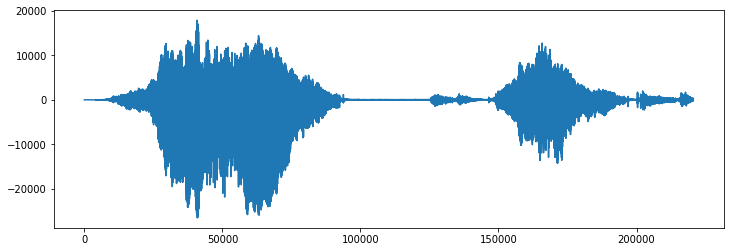

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)
plt.savefig('original_audio.png')
experiment.log_image('original_audio.png')

In [14]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 40)

In [15]:
print(mfccs.shape)


(40, 216)


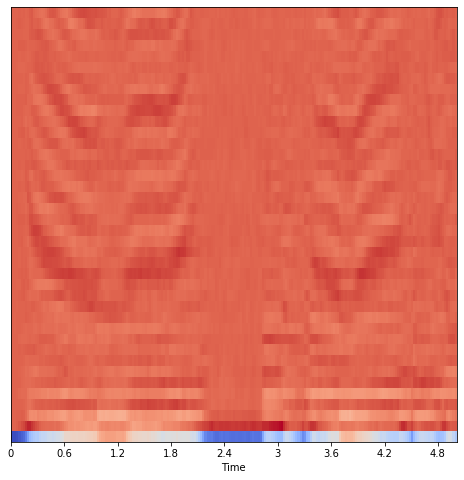

In [18]:
import librosa.display
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')
plt.savefig('MFCCs.png')


In [20]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed

In [24]:
df.iloc[0]

filename              1-187207-A-20.wav
chroma_stft                    0.331608
rmse                           0.118625
spectral_centroid           1472.957975
spectral_bandwidth          1616.546255
rolloff                     2735.514323
zero_crossing_rate             0.072078
mfcc1                       -283.164612
mfcc2                        102.490028
mfcc3                         -8.504624
mfcc4                           8.03529
mfcc5                        -19.809656
mfcc6                          3.051079
mfcc7                           2.37923
mfcc8                         -7.019489
mfcc9                          6.673357
mfcc10                         8.143367
mfcc11                         1.013203
mfcc12                        -2.902098
mfcc13                        -4.647758
mfcc14                        -1.844332
mfcc15                         4.447973
mfcc16                         9.988544
mfcc17                        11.963989
mfcc18                          5.56821


In [26]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
# Convert features and corresponding classification labels into numpy arrays
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = to_categorical(encoder.fit_transform(genre_list))

In [27]:
X =np.array(data.iloc[:, :-1], dtype = float)

In [29]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 127)

In [33]:
num_labels = y.shape[1]
filter_size = 2
def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

model = build_model_graph()

In [39]:
# Display model architecture summary 
model.summary()
# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  6912      
_________________________________________________________________
activation_3 (Activation)    multiple                  0         
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  65792     
_________________________________________________________________
activation_4 (Activation)    multiple                  0         
_________________________________________________________________
dropout_3 (Dropout)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                 

In [40]:
print("Pre-training accuracy: %.4f%%" % accuracy)


Pre-training accuracy: 44.1176%


In [41]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
num_epochs = 100
num_batch_size = 32
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 2.5098 - accuracy: 0.50 - 0s 18ms/step - loss: 2.6647 - accuracy: 0.5630 - val_loss: 0.6378 - val_accuracy: 0.6176
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 3.4772 - accuracy: 0.46 - 0s 16ms/step - loss: 2.2826 - accuracy: 0.5630 - val_loss: 0.6264 - val_accuracy: 0.6176
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 1.9126 - accuracy: 0.53 - 0s 19ms/step - loss: 3.1255 - accuracy: 0.4963 - val_loss: 0.6419 - val_accuracy: 0.3529
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 1.7792 - accuracy: 0.59 - 0s 18ms/step - loss: 1.4203 - accuracy: 0.6148 - val_loss: 0.6451 - val_accuracy: 0.4412
Epoch 5/100
5/5 [==============================] - ETA: 0s - loss: 0.5998 - accuracy: 0.75 - 0s 19ms/step - loss: 2.0257 - accuracy: 0.5852 - val_loss: 0.6440 - val_accuracy: 0.4706
Epoch 6/100
5/5 [==============================] - ETA: 0s - loss: 1.6984 - accuracy: 0.50

Epoch 46/100
5/5 [==============================] - ETA: 0s - loss: 0.9718 - accuracy: 0.46 - 0s 24ms/step - loss: 1.0595 - accuracy: 0.5852 - val_loss: 0.6352 - val_accuracy: 0.6176
Epoch 47/100
5/5 [==============================] - ETA: 0s - loss: 1.0428 - accuracy: 0.65 - 0s 21ms/step - loss: 1.3482 - accuracy: 0.6222 - val_loss: 0.6271 - val_accuracy: 0.6176
Epoch 48/100
5/5 [==============================] - ETA: 0s - loss: 0.6296 - accuracy: 0.65 - 0s 17ms/step - loss: 0.8328 - accuracy: 0.5407 - val_loss: 0.6251 - val_accuracy: 0.6176
Epoch 49/100
5/5 [==============================] - ETA: 0s - loss: 1.0517 - accuracy: 0.46 - 0s 17ms/step - loss: 1.0901 - accuracy: 0.5407 - val_loss: 0.6278 - val_accuracy: 0.6176
Epoch 50/100
5/5 [==============================] - ETA: 0s - loss: 1.4203 - accuracy: 0.53 - 0s 18ms/step - loss: 1.3914 - accuracy: 0.5926 - val_loss: 0.6352 - val_accuracy: 0.6176
Epoch 51/100
5/5 [==============================] - ETA: 0s - loss: 0.9140 - accuracy

Epoch 91/100
5/5 [==============================] - ETA: 0s - loss: 0.6069 - accuracy: 0.65 - 0s 20ms/step - loss: 0.7600 - accuracy: 0.6222 - val_loss: 0.6436 - val_accuracy: 0.6176
Epoch 92/100
5/5 [==============================] - ETA: 0s - loss: 0.6764 - accuracy: 0.50 - 0s 16ms/step - loss: 1.0451 - accuracy: 0.5704 - val_loss: 0.6386 - val_accuracy: 0.6176
Epoch 93/100
5/5 [==============================] - ETA: 0s - loss: 1.1226 - accuracy: 0.59 - 0s 20ms/step - loss: 1.0518 - accuracy: 0.5407 - val_loss: 0.6373 - val_accuracy: 0.6176
Epoch 94/100
5/5 [==============================] - ETA: 0s - loss: 0.6314 - accuracy: 0.75 - 0s 20ms/step - loss: 0.8109 - accuracy: 0.5704 - val_loss: 0.6372 - val_accuracy: 0.6176
Epoch 95/100
5/5 [==============================] - ETA: 0s - loss: 0.9149 - accuracy: 0.50 - 0s 16ms/step - loss: 0.9159 - accuracy: 0.5481 - val_loss: 0.6378 - val_accuracy: 0.6176
Epoch 96/100
5/5 [==============================] - ETA: 0s - loss: 0.5284 - accuracy

In [42]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 57.78%
Testing Accuracy: 61.76%


In [216]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [217]:
import pathlib
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
pathlib.Path(f'live_data/').mkdir(parents=True, exist_ok=True)
# for filename in os.listdir(f'b_cry/{g}'):
songname = f'output.wav'
y, sr = librosa.load(songname, mono=True, duration=7)
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
plt.axis('off');
plt.savefig(f'live_data/output.png')
plt.clf()

<Figure size 576x576 with 0 Axes>

In [218]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [219]:
import csv
file = open('predict.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
# genres = 'discomfort belly_pain burping hungry'.split()
# for g in genres:
#     for filename in os.listdir(f'b_cry/{g}'):
# songname = f'b_cry/{g}/{filename}'
songname = f'output.wav'
y, sr = librosa.load(songname, mono=True, duration=5)
rmse = librosa.feature.rms(y=y)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
to_append = f'output.wav {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'   
for e in mfcc:
    to_append += f' {np.mean(e)}'
# to_append += f' {model.predict(live_data.iloc[0])}'
#to_append += f' live_data_genre'
file = open('predict.csv', 'a', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(to_append.split())
live_data = pd.read_csv('predict.csv')
live_data = live_data.drop(['filename'],axis=1)


In [220]:
#print(live_data.iloc[0][0:26])
Xnew = np.array([live_data.iloc[0][0:26]])
print(Xnew)
ynew = model.predict_classes(Xnew)
print("Predicted=%s" % (ynew))
#live_data = data.drop(['filename'],axis=1)
#print(model.predict(live_data.iloc[:, -1]))
# print(type(live_data.iloc[0]))
#print(model.predict_classes(live_data.iloc[0]))
# print(live_data.iloc[0])

[[ 4.03602093e-01  3.08599807e-02  1.27840271e+03  1.89391820e+03
   2.84352926e+03  2.79744466e-02 -3.27495880e+02  1.39179581e+02
   2.29816246e+00  3.23627853e+01  1.28940499e+00  4.80220222e+00
   8.06971645e+00  1.13445997e+00 -5.69381142e+00  4.74652529e+00
  -2.74218798e+00  8.24208736e+00  5.86956692e+00  8.74790192e-01
   4.65812778e+00  5.99671316e+00 -6.22864103e+00  6.72868061e+00
  -4.52223206e+00  1.66765010e+00]]
Predicted=[1]
